In [ ]:
import pip
pip.main(['install', 'pandas'])
pip.main(['install', 'matplotlib'])
pip.main(['install', 'seaborn'])
pip.main(['install', 'scikit-learn'])
!pip.main(['install', 'nbmerge'])
pip.main(['install', 'nbformat'])
!pip install nbformat ipynb-py-convert

CHARGEMENT DES BIBLIOTHEQUES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


CHARGEMENT DU JEU DE DONNEES

In [13]:
CLIENTS = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\CLIENTS_NET.pkl"
data1 = pd.read_pickle(CLIENTS)

In [14]:
data1

,IDCLIENT,CIVILITE,MAGASIN,DATEREADHESION,ANCIENNETE,CODEINSEE,age_group,ANCIENNETE_RETRA
0,155891.0,Madame,VLG,2017-04-04,13,74224,Inconnue,13
1,156023.0,Monsieur,VLG,2014-06-21,11,74189,AGE DE 46-60,11
2,124203.0,Madame,BEA,2017-10-12,13,63070,Inconnue,13
3,156190.0,Madame,SUR,2015-05-24,10,92026,Inconnue,10
4,144444.0,Monsieur,LAB,2016-12-18,11,31555,Inconnue,11
...,...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,IAB,2018-01-06,8,38053,Inconnue,Inconnue
720086,2297275.0,Monsieur,SEM,2018-01-06,6,57067,AGE DE 31-45,Inconnue
720087,2305548.0,Monsieur,PRI,2018-01-06,6,38318,Inconnue,Inconnue
720088,84175.0,Madame,GAI,2018-01-07,17,74082,AGE DE 61-100,Inconnue


In [15]:
CODEINSEE = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\CODEINSEE_NET.pkl"
data6 = pd.read_pickle(CODEINSEE)

In [16]:
data6

,Code,Libellé,Région,Département,Emploi total,Administration publique,Agriculture,Bâtiment-Travaux Publics,Commerce inter-entreprises,"Conception, Recherche",...,"Transports, Logistique",Prestations Intellectuelles,"Santé, Action Sociale",Services de Proximité,Commerce \ninter-entreprises,"Conception, Recherche.1","Culture, Loisirs.1",Gestion.1,Prestations Intellectuelles.1,Total
0,1001,L'Abergement-Clémenciat,84,1,72,5,5,14,5,0,...,0,0,0,14,0,0,0,0,0,0
1,1002,L'Abergement-de-Varey,84,1,25,0,15,0,0,0,...,0,0,0,0,0,0,4,0,0,4
2,1004,Ambérieu-en-Bugey,84,1,7 697,842,23,514,229,79,...,1 017,247,808,630,46,53,42,155,84,380
3,1005,Ambérieux-en-Dombes,84,1,332,5,4,59,10,0,...,0,5,54,35,5,0,5,5,0,15
4,1006,Ambléon,84,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34940,97613,M'Tsangamouji,6,976,495,128,10,77,0,0,...,15,5,15,45,0,0,0,0,0,0
34941,97614,Ouangani,6,976,1 254,168,67,155,0,5,...,48,13,90,105,0,3,5,10,8,25
34942,97615,Pamandzi,6,976,1 642,460,10,55,10,10,...,125,27,72,200,3,5,35,10,10,62
34943,97616,Sada,6,976,1 447,175,45,210,0,0,...,117,8,35,190,0,0,5,15,3,23


In [17]:
ARTICLES = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\ARTICLES_NET.pkl"
data4 = pd.read_pickle(ARTICLES)

In [18]:
data4

,CODEARTICLE,CODEUNIVERS,CODEFAMILLE
1,1001,U2,130
2,100125,U1,010
3,100150,U1,010
4,10018,U1,100
5,10019,U1,100
...,...,...,...
665941,407717,U3,120
665942,407719,U3,120
665943,407720,U3,120
665944,407721,U3,120


In [19]:
MAGASINS = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\MAGASINS_NET.pkl"
data5 = pd.read_pickle(MAGASINS)

In [20]:
data5

,CODESOCIETE,VILLE,LIBELLEDEPARTEMENT,LIBELLEREGIONCOMMERCIALE
0,MET,METZ-TESSY,74,Rhône-Alpes
1,ALB,GILLY SUR ISERE,73,Rhône-Alpes
2,ALM,LES MILLES,13,Littoral
3,AVI,VILLENEUVE-LES-AVIGNON,30,Littoral
4,BEA,BEAUMONT,63,Centre-Paris
...,...,...,...,...
62,STR,SISTERON,4,Littoral
63,NEV,NEVERS CEDEX,58,Centre-Paris
64,BSN,CESSON,77,Centre-Paris
65,CAG,CAGNES SUR MER,6,Littoral


In [3]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\CLIENT.csv"
data1 = pd.read_csv(dataset_path, sep='|', low_memory=False)
print(data1.shape)
print(list(data1.columns))

(845876, 10)
['IDCLIENT', 'CIVILITE', 'DATENAISSANCE', 'MAGASIN', 'DATEDEBUTADHESION', 'DATEREADHESION', 'DATEFINADHESION', 'VIP', 'CODEINSEE', 'PAYS']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [4]:
data1

,IDCLIENT,CIVILITE,DATENAISSANCE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,VIP,CODEINSEE,PAYS
0,155891.0,MADAME,NaN,VLG,13/05/2005 0:00:00,4/04/2017 0:00:00,30/04/2018 0:00:00,0,74224,FR
1,156023.0,MONSIEUR,7/08/1966 0:00:00,VLG,14/05/2005 0:00:00,21/06/2014 0:00:00,30/06/2016 0:00:00,0,74189,FR
2,124203.0,MADAME,NaN,BEA,16/03/2005 0:00:00,12/10/2017 0:00:00,31/10/2018 0:00:00,0,63070,FR
3,156190.0,MADAME,24/07/1976 0:00:00,SUR,28/08/2006 0:00:00,24/05/2015 0:00:00,31/05/2016 0:00:00,0,92026,FR
4,144444.0,MONSIEUR,NaN,LAB,29/04/2006 0:00:00,18/12/2016 0:00:00,31/12/2017 0:00:00,0,31555,FR
...,...,...,...,...,...,...,...,...,...,...
845871,1970111.0,MONSIEUR,NaN,IAB,14/04/2011 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,0,38053,FR
845872,2297275.0,MONSIEUR,6/02/1988 0:00:00,SEM,7/03/2013 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,0,57067,FR
845873,2305548.0,MONSIEUR,NaN,PRI,22/03/2013 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,0,38318,FR
845874,84175.0,MADAME,7/04/1950 0:00:00,GAI,29/10/2002 0:00:00,7/01/2018 0:00:00,31/01/2019 0:00:00,0,74082,FR


In [5]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845876 entries, 0 to 845875
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   IDCLIENT           845876 non-null  float64
 1   CIVILITE           845876 non-null  object 
 2   DATENAISSANCE      507902 non-null  object 
 3   MAGASIN            845876 non-null  object 
 4   DATEDEBUTADHESION  845876 non-null  object 
 5   DATEREADHESION     507816 non-null  object 
 6   DATEFINADHESION    845876 non-null  object 
 7   VIP                845876 non-null  int64  
 8   CODEINSEE          818455 non-null  object 
 9   PAYS               845873 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 64.5+ MB
None


Nous allons procéder à la suppression des clients VIP, qui ont un comportement atypique qui viendra biaiser nos résultats.

In [6]:
# Supprimer les lignes où la valeur de la colonne 'VIP' est égale à 1
data1 = data1[data1['VIP'] != 1]

# Vérifier la nouvelle forme du DataFrame
print(data1.shape)

(735425, 10)


In [7]:
data1 = data1.drop("VIP",axis=1)

Vérification du traitement.

In [8]:
data1

,IDCLIENT,CIVILITE,DATENAISSANCE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,CODEINSEE,PAYS
0,155891.0,MADAME,NaN,VLG,13/05/2005 0:00:00,4/04/2017 0:00:00,30/04/2018 0:00:00,74224,FR
1,156023.0,MONSIEUR,7/08/1966 0:00:00,VLG,14/05/2005 0:00:00,21/06/2014 0:00:00,30/06/2016 0:00:00,74189,FR
2,124203.0,MADAME,NaN,BEA,16/03/2005 0:00:00,12/10/2017 0:00:00,31/10/2018 0:00:00,63070,FR
3,156190.0,MADAME,24/07/1976 0:00:00,SUR,28/08/2006 0:00:00,24/05/2015 0:00:00,31/05/2016 0:00:00,92026,FR
4,144444.0,MONSIEUR,NaN,LAB,29/04/2006 0:00:00,18/12/2016 0:00:00,31/12/2017 0:00:00,31555,FR
...,...,...,...,...,...,...,...,...,...
845871,1970111.0,MONSIEUR,NaN,IAB,14/04/2011 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,38053,FR
845872,2297275.0,MONSIEUR,6/02/1988 0:00:00,SEM,7/03/2013 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,57067,FR
845873,2305548.0,MONSIEUR,NaN,PRI,22/03/2013 0:00:00,6/01/2018 0:00:00,31/01/2019 0:00:00,38318,FR
845874,84175.0,MADAME,7/04/1950 0:00:00,GAI,29/10/2002 0:00:00,7/01/2018 0:00:00,31/01/2019 0:00:00,74082,FR


La ligne de code ci-dessous nous permet de formater le format de la date.

In [9]:
# Adapter le format de date pour les colonnes spécifiées
date_columns = ['DATENAISSANCE', 'DATEDEBUTADHESION', 'DATEREADHESION', 'DATEFINADHESION']
for col in date_columns:
    data1[col] = pd.to_datetime(data1[col], format='%d/%m/%Y %H:%M:%S',errors = 'coerce').dt.strftime('%d/%m/%Y')

Vérification du traitement.

In [10]:
data1

,IDCLIENT,CIVILITE,DATENAISSANCE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,CODEINSEE,PAYS
0,155891.0,MADAME,NaN,VLG,13/05/2005,04/04/2017,30/04/2018,74224,FR
1,156023.0,MONSIEUR,07/08/1966,VLG,14/05/2005,21/06/2014,30/06/2016,74189,FR
2,124203.0,MADAME,NaN,BEA,16/03/2005,12/10/2017,31/10/2018,63070,FR
3,156190.0,MADAME,24/07/1976,SUR,28/08/2006,24/05/2015,31/05/2016,92026,FR
4,144444.0,MONSIEUR,NaN,LAB,29/04/2006,18/12/2016,31/12/2017,31555,FR
...,...,...,...,...,...,...,...,...,...
845871,1970111.0,MONSIEUR,NaN,IAB,14/04/2011,06/01/2018,31/01/2019,38053,FR
845872,2297275.0,MONSIEUR,06/02/1988,SEM,07/03/2013,06/01/2018,31/01/2019,57067,FR
845873,2305548.0,MONSIEUR,NaN,PRI,22/03/2013,06/01/2018,31/01/2019,38318,FR
845874,84175.0,MADAME,07/04/1950,GAI,29/10/2002,07/01/2018,31/01/2019,74082,FR


Cette ligne de code nous permet d'identifier le nombre d'occurence de chaque civilité, pour identifier les éventuels regroupements à effectuer. 

In [11]:
#modalités variables:
data1['CIVILITE'].value_counts(dropna = False)

CIVILITE
MADAME      393703
MONSIEUR    337360
Mr            1431
Mme           1284
madame         976
monsieur       671
Name: count, dtype: int64

Il convient de procéder aux regroupements ci-dessous.

In [12]:
#regroupement des modalités:
data1['CIVILITE']=np.where(data1['CIVILITE'] =='MADAME', 'Madame', data1['CIVILITE']) 
data1['CIVILITE']=np.where(data1['CIVILITE'] =='Mme', 'Madame', data1['CIVILITE'])
data1['CIVILITE']=np.where(data1['CIVILITE'] =='madame', 'Madame', data1['CIVILITE']) 
data1['CIVILITE']=np.where(data1['CIVILITE'] =='MONSIEUR', 'Monsieur', data1['CIVILITE'])
data1['CIVILITE']=np.where(data1['CIVILITE'] =='Mr', 'Monsieur', data1['CIVILITE'])
data1['CIVILITE']=np.where(data1['CIVILITE'] =='monsieur', 'Monsieur', data1['CIVILITE'])

Vérification du traitement.

In [13]:
data1['CIVILITE'].value_counts(dropna = False)

CIVILITE
Madame      395963
Monsieur    339462
Name: count, dtype: int64

Cette ligne de code nous permet d'identifier le nombre d'occurence de chaque magasin, pour identifier les éventuels regroupements à effectuer.

In [14]:
data1['MAGASIN'].value_counts(dropna = False)

MAGASIN
PRI    23963
SEY    23572
VIB    22223
SUR    20923
MOU    20887
       ...  
VIV     3187
SAL     2836
STR     2667
EST     1145
BAR     1039
Name: count, Length: 67, dtype: int64

Les données à traiter concernant la France, la série de code ci-dessous nous permet de ne conserver que ce pays.

In [15]:
# Filtrer les lignes pour ne garder que celles avec "France" dans la colonne "Pays"
data1 = data1[data1['PAYS'] == 'FR']

# Réindexer le DataFrame après avoir filtré les lignes
data1.reset_index(drop=True, inplace=True)

In [16]:
data1['PAYS'].value_counts(dropna = False)

PAYS
FR    720090
Name: count, dtype: int64

La serie de codes ci-dessous nous permet de traiter la date de naissance des clients afin d'en déterminer l'âge puis des tranches d'âges.

In [ ]:
#Convertir la colonne de date de naissance en objet datetime :

data1['DATENAISSANCE'] = pd.to_datetime(data1['DATENAISSANCE'],errors = 'coerce')

#En créer une nouvelle colonne pour l'âge en calculant la différence entre la date actuelle et la date de naissance :

from datetime import datetime
today = datetime.today()
data1['AGE'] = today.year - data1['DATENAISSANCE'].dt.year
#Discrétiser l'âge en créant des catégories d'âge. Par exemple, diviser en groupes d'âge :
bins = [18, 30, 45, 60, 100]
data1['AGE_GROUP'] = pd.cut(data1['AGE'], bins, labels=['AGE DE 18-30', 'AGE DE 31-45', 'AGE DE 46-60', 'AGE DE 61-100'])

Vérification du traitement.

In [18]:
data1['AGE_GROUP'].value_counts(dropna = False)

AGE_GROUP
NaN              548518
AGE DE 61-100     67546
AGE DE 46-60      57057
AGE DE 31-45      42700
AGE DE 18-30       4269
Name: count, dtype: int64

Après ce traitement, il convient de renommer la variable concernée.

In [19]:
# Renommer la colonne 'DATENAISSANCE' en 'AGE'
data1 = data1.rename(columns={'DATENAISSANCE': 'AGE'})

Vérification du traitement.

In [20]:
data1

,IDCLIENT,CIVILITE,AGE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,CODEINSEE,PAYS,AGE,AGE_GROUP
0,155891.0,Madame,NaT,VLG,13/05/2005,04/04/2017,30/04/2018,74224,FR,NaN,NaN
1,156023.0,Monsieur,1966-07-08,VLG,14/05/2005,21/06/2014,30/06/2016,74189,FR,58.0,AGE DE 46-60
2,124203.0,Madame,NaT,BEA,16/03/2005,12/10/2017,31/10/2018,63070,FR,NaN,NaN
3,156190.0,Madame,NaT,SUR,28/08/2006,24/05/2015,31/05/2016,92026,FR,NaN,NaN
4,144444.0,Monsieur,NaT,LAB,29/04/2006,18/12/2016,31/12/2017,31555,FR,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,NaT,IAB,14/04/2011,06/01/2018,31/01/2019,38053,FR,NaN,NaN
720086,2297275.0,Monsieur,1988-06-02,SEM,07/03/2013,06/01/2018,31/01/2019,57067,FR,36.0,AGE DE 31-45
720087,2305548.0,Monsieur,NaT,PRI,22/03/2013,06/01/2018,31/01/2019,38318,FR,NaN,NaN
720088,84175.0,Madame,1950-07-04,GAI,29/10/2002,07/01/2018,31/01/2019,74082,FR,74.0,AGE DE 61-100


Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET, l'âge et les tranches d'âges en caractère. Nous n'avons pas nécessité à conserver ces valeurs en numérique.

In [21]:
data1['IDCLIENT'] = data1['IDCLIENT'].astype(str)
data1['AGE'] = data1['AGE'].astype(str)
data1['AGE_GROUP'] = data1['AGE_GROUP'].astype(str)

Vérification du traitement.

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720090 entries, 0 to 720089
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   IDCLIENT           720090 non-null  object
 1   CIVILITE           720090 non-null  object
 2   AGE                720090 non-null  object
 3   MAGASIN            720090 non-null  object
 4   DATEDEBUTADHESION  720090 non-null  object
 5   DATEREADHESION     410990 non-null  object
 6   DATEFINADHESION    720090 non-null  object
 7   CODEINSEE          709392 non-null  object
 8   PAYS               720090 non-null  object
 9   AGE                720090 non-null  object
 10  AGE_GROUP          720090 non-null  object
dtypes: object(11)
memory usage: 60.4+ MB


La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [23]:
print(data1.duplicated().sum())
data1 = data1.drop_duplicates()

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes.

In [24]:
# Tableau des valeurs manquantes par colonne
missing_values = data1.isnull().sum()
missing_percent = (missing_values / len(data1)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                   Missing Values  Percentage
IDCLIENT                        0    0.000000
CIVILITE                        0    0.000000
AGE                             0    0.000000
MAGASIN                         0    0.000000
DATEDEBUTADHESION               0    0.000000
DATEREADHESION             309100   42.925190
DATEFINADHESION                 0    0.000000
CODEINSEE                   10698    1.485648
PAYS                            0    0.000000
AGE                             0    0.000000
AGE_GROUP                       0    0.000000


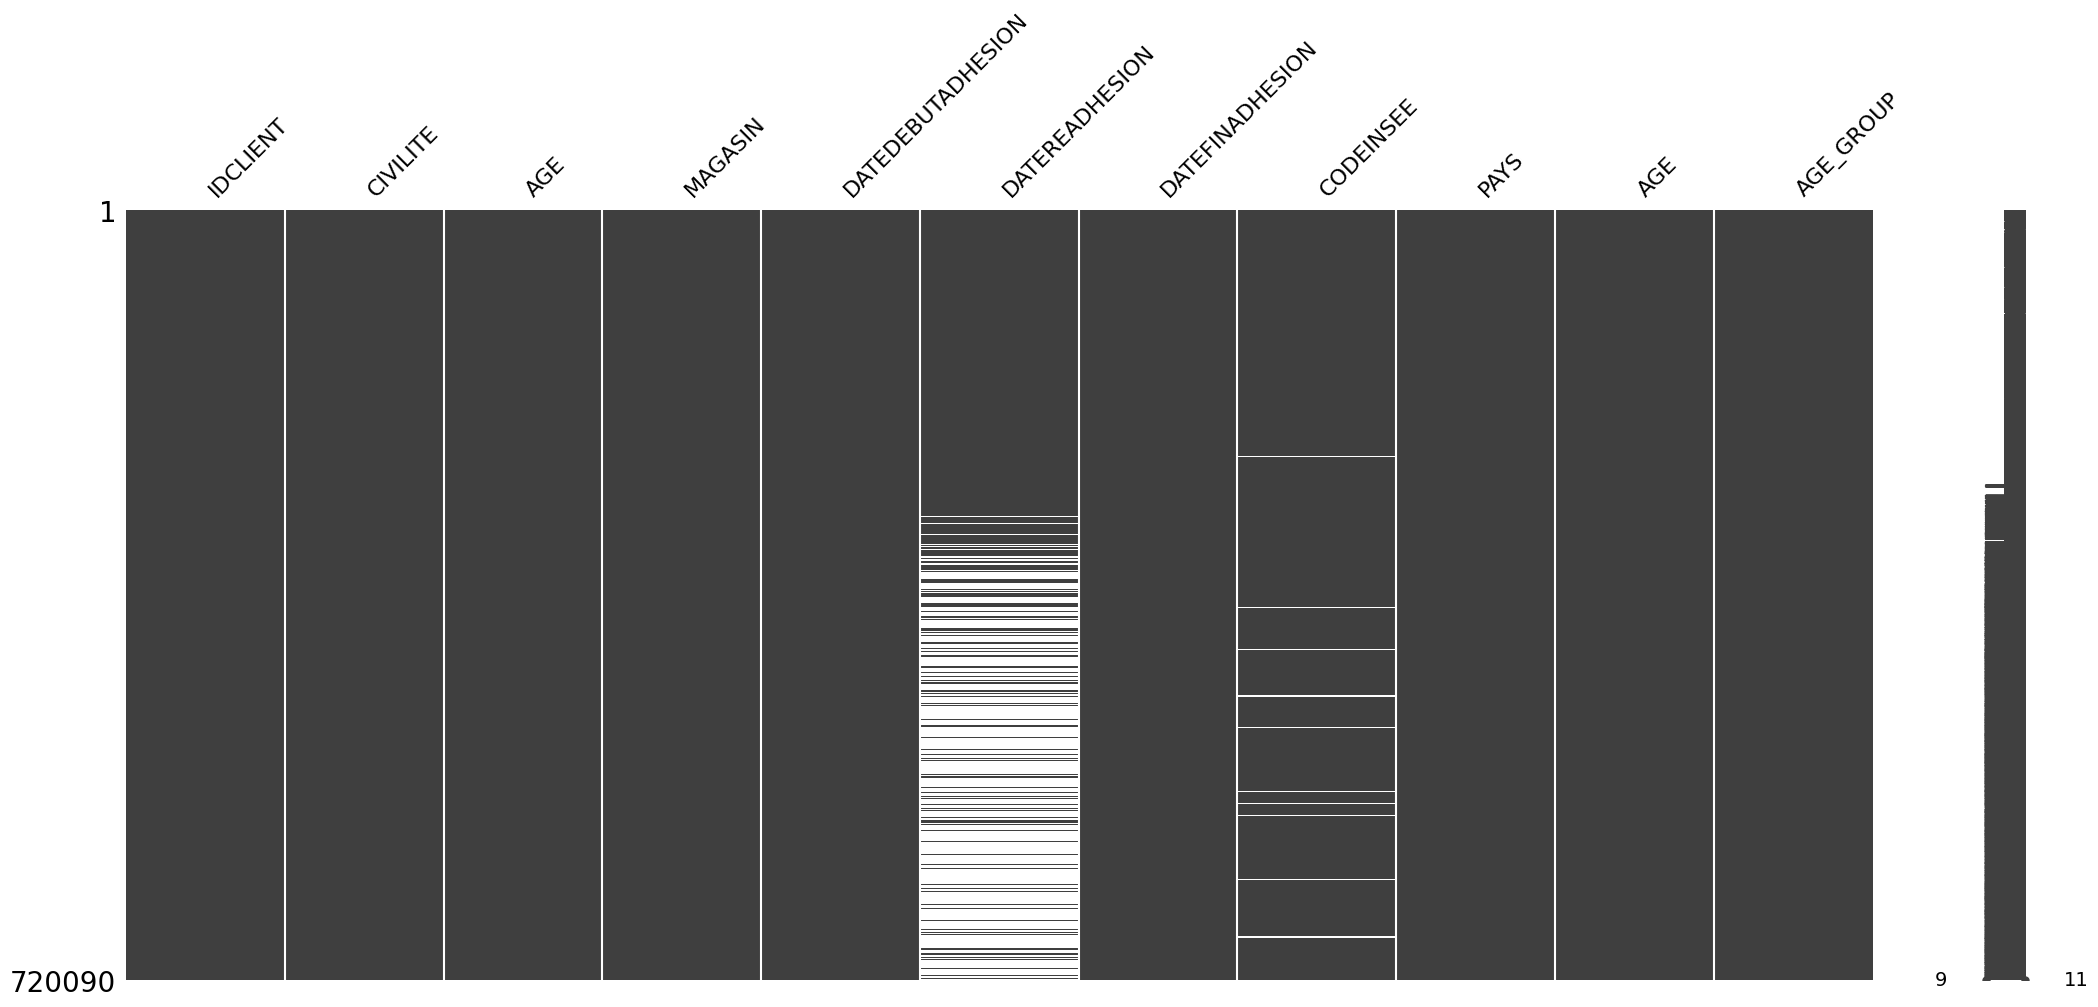

In [25]:
# Visualiser les valeurs manquantes avec missingno
import missingno as msno
msno.matrix(data1)
plt.show()

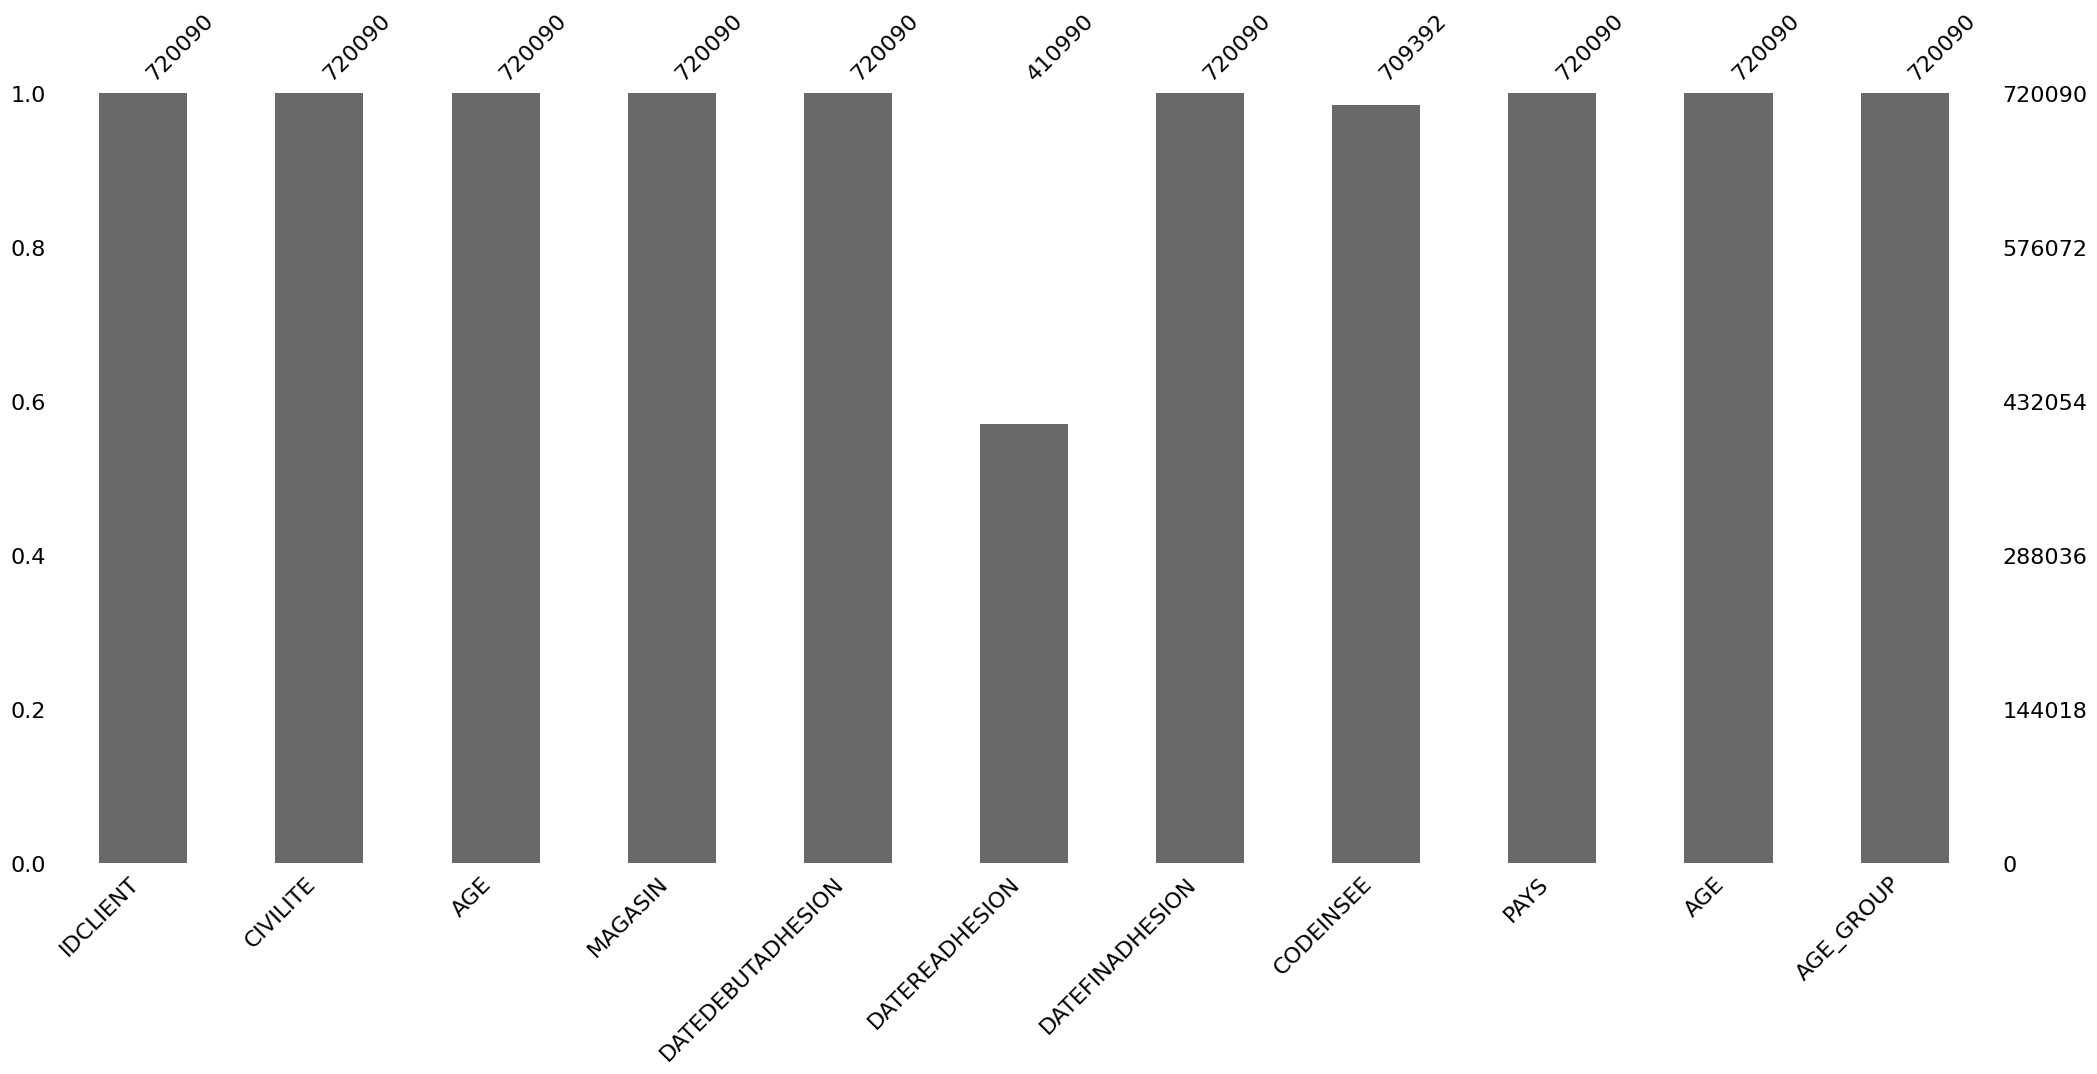

In [26]:
msno.bar(data1)
plt.show()

La série de codes ci-dessous nous permet de traiter les valeurs manquantes détéctées, sur les variables concernées.

In [27]:
# Interpolation des dates manquantes
data1['DATEREADHESION'] = data1['DATEREADHESION'].interpolate(method='time')

# Afficher le DataFrame après l'interpolation
print(data1)

         IDCLIENT  CIVILITE         AGE MAGASIN DATEDEBUTADHESION  \
0        155891.0    Madame         NaT     VLG        13/05/2005   
1        156023.0  Monsieur  1966-07-08     VLG        14/05/2005   
2        124203.0    Madame         NaT     BEA        16/03/2005   
3        156190.0    Madame         NaT     SUR        28/08/2006   
4        144444.0  Monsieur         NaT     LAB        29/04/2006   
...           ...       ...         ...     ...               ...   
720085  1970111.0  Monsieur         NaT     IAB        14/04/2011   
720086  2297275.0  Monsieur  1988-06-02     SEM        07/03/2013   
720087  2305548.0  Monsieur         NaT     PRI        22/03/2013   
720088    84175.0    Madame  1950-07-04     GAI        29/10/2002   
720089  1280004.0  Monsieur         NaT     SGL        23/06/2007   

       DATEREADHESION DATEFINADHESION CODEINSEE PAYS   AGE      AGE_GROUP  
0          04/04/2017      30/04/2018     74224   FR   nan            nan  
1          21/06/20

C:\Users\belga\AppData\Local\Temp\ipykernel_46856\1410952053.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data1['DATEREADHESION'] = data1['DATEREADHESION'].interpolate(method='time')


In [28]:
data1['CODEINSEE'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
720085    False
720086    False
720087    False
720088    False
720089    False
Name: CODEINSEE, Length: 720090, dtype: bool

In [29]:
data1.dropna(subset=['CODEINSEE'], inplace=True)

In [30]:
data1['DATEREADHESION'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
720085    False
720086    False
720087    False
720088    False
720089    False
Name: DATEREADHESION, Length: 709392, dtype: bool

In [31]:
data1.dropna(subset=['DATEREADHESION'], inplace=True)

In [32]:
data1['AGE_GROUP'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
720085    False
720086    False
720087    False
720088    False
720089    False
Name: AGE_GROUP, Length: 407389, dtype: bool

In [33]:
data1['AGE_GROUP'].value_counts()

AGE_GROUP
nan              326057
AGE DE 61-100     39498
AGE DE 46-60      27990
AGE DE 31-45      13240
AGE DE 18-30        604
Name: count, dtype: int64

In [34]:
data1['AGE_GROUP'] = data1['AGE_GROUP'].replace(np.nan, "Inconnue")


In [ ]:
data1['AGE_GROUP']=data1[['AGE_GROUP']].applymap(lambda x: "Inconnue" if x=='nan' else x)


In [36]:
data1['AGE_GROUP'].value_counts()

AGE_GROUP
Inconnue         326057
AGE DE 61-100     39498
AGE DE 46-60      27990
AGE DE 31-45      13240
AGE DE 18-30        604
Name: count, dtype: int64

In [37]:
data1.dropna(subset=['AGE_GROUP'], inplace=True)

Vérification du taitement.

In [38]:
data1.isnull().sum()

IDCLIENT             0
CIVILITE             0
AGE                  0
MAGASIN              0
DATEDEBUTADHESION    0
DATEREADHESION       0
DATEFINADHESION      0
CODEINSEE            0
PAYS                 0
AGE                  0
AGE_GROUP            0
dtype: int64

Le traitement des valeurs aberrantes ne concernant que les variables numériques, nous n'allons pas procéder à ce traitement car aucune de nos variables n'est concernées sur ce dataframe.

Suppression des colonnes dont les informations nous serons pas nécessairement utiles dans le cadre de notre projet.

In [39]:
data1.drop(columns=['PAYS'], inplace=True)

In [40]:
data1.drop(columns=['AGE'], inplace=True)

In [41]:
data1

,IDCLIENT,CIVILITE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,CODEINSEE,AGE_GROUP
0,155891.0,Madame,VLG,13/05/2005,04/04/2017,30/04/2018,74224,Inconnue
1,156023.0,Monsieur,VLG,14/05/2005,21/06/2014,30/06/2016,74189,AGE DE 46-60
2,124203.0,Madame,BEA,16/03/2005,12/10/2017,31/10/2018,63070,Inconnue
3,156190.0,Madame,SUR,28/08/2006,24/05/2015,31/05/2016,92026,Inconnue
4,144444.0,Monsieur,LAB,29/04/2006,18/12/2016,31/12/2017,31555,Inconnue
...,...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,IAB,14/04/2011,06/01/2018,31/01/2019,38053,Inconnue
720086,2297275.0,Monsieur,SEM,07/03/2013,06/01/2018,31/01/2019,57067,AGE DE 31-45
720087,2305548.0,Monsieur,PRI,22/03/2013,06/01/2018,31/01/2019,38318,Inconnue
720088,84175.0,Madame,GAI,29/10/2002,07/01/2018,31/01/2019,74082,AGE DE 61-100


La série de codes ci-dessous nous permet de modifier le format des dates de début et de fin d'adhésion afin de calculer l'ancienneté des clients.

In [42]:
import datetime
from datetime import timedelta

In [ ]:
data1['DATEDEBUTADHESION'] = pd.to_datetime(data1['DATEDEBUTADHESION'])

In [44]:
data1['DATEDEBUTADHESION'] = data1['DATEDEBUTADHESION'].dt.year.astype(int)

In [ ]:
data1['DATEFINADHESION'] = pd.to_datetime(data1['DATEFINADHESION'])

In [46]:
data1['DATEFINADHESION'] = data1['DATEFINADHESION'].dt.year.astype(int)

In [47]:
if 'DATEDEBUTADHESION' in data1.columns:
    Date_début = data1['DATEDEBUTADHESION']
    print(Date_début.head())
else:
    print("La colonne 'DATEDEBUTADHESION' n'existe pas dans le DataFrame.")

0    2005
1    2005
2    2005
3    2006
4    2006
Name: DATEDEBUTADHESION, dtype: int32


In [48]:
if 'DATEFINADHESION' in data1.columns:
    Date_fin = data1['DATEFINADHESION']
    print(Date_fin.head())
else:
    print("La colonne 'DATEFINADHESION' n'existe pas dans le DataFrame.")

0    2018
1    2016
2    2018
3    2016
4    2017
Name: DATEFINADHESION, dtype: int32


In [49]:
ANCIENNETE = Date_fin - Date_début

In [50]:
print(ANCIENNETE)

0         13
1         11
2         13
3         10
4         11
          ..
720085     8
720086     6
720087     6
720088    17
720089    12
Length: 407389, dtype: int32


Nous allons maintenant intégrer cette variables d'ancienneté à notre jeu de données.

In [51]:
data1.insert(loc=6, column='ANCIENNETE', value=ANCIENNETE)

In [52]:
data1

,IDCLIENT,CIVILITE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,ANCIENNETE,CODEINSEE,AGE_GROUP
0,155891.0,Madame,VLG,2005,04/04/2017,2018,13,74224,Inconnue
1,156023.0,Monsieur,VLG,2005,21/06/2014,2016,11,74189,AGE DE 46-60
2,124203.0,Madame,BEA,2005,12/10/2017,2018,13,63070,Inconnue
3,156190.0,Madame,SUR,2006,24/05/2015,2016,10,92026,Inconnue
4,144444.0,Monsieur,LAB,2006,18/12/2016,2017,11,31555,Inconnue
...,...,...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,IAB,2011,06/01/2018,2019,8,38053,Inconnue
720086,2297275.0,Monsieur,SEM,2013,06/01/2018,2019,6,57067,AGE DE 31-45
720087,2305548.0,Monsieur,PRI,2013,06/01/2018,2019,6,38318,Inconnue
720088,84175.0,Madame,GAI,2002,07/01/2018,2019,17,74082,AGE DE 61-100


Ci-dessous, nous procédons à la suppression des dates de début et de fin d'adhésion car nous n'en avons plus besoin.

In [53]:
data1.drop(columns=['DATEDEBUTADHESION'], inplace=True)

In [54]:
data1.drop(columns=['DATEFINADHESION'], inplace=True)

Vérification des traitements.

In [55]:
data1

,IDCLIENT,CIVILITE,MAGASIN,DATEREADHESION,ANCIENNETE,CODEINSEE,AGE_GROUP
0,155891.0,Madame,VLG,04/04/2017,13,74224,Inconnue
1,156023.0,Monsieur,VLG,21/06/2014,11,74189,AGE DE 46-60
2,124203.0,Madame,BEA,12/10/2017,13,63070,Inconnue
3,156190.0,Madame,SUR,24/05/2015,10,92026,Inconnue
4,144444.0,Monsieur,LAB,18/12/2016,11,31555,Inconnue
...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,IAB,06/01/2018,8,38053,Inconnue
720086,2297275.0,Monsieur,SEM,06/01/2018,6,57067,AGE DE 31-45
720087,2305548.0,Monsieur,PRI,06/01/2018,6,38318,Inconnue
720088,84175.0,Madame,GAI,07/01/2018,17,74082,AGE DE 61-100


In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407389 entries, 0 to 720089
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   IDCLIENT        407389 non-null  object
 1   CIVILITE        407389 non-null  object
 2   MAGASIN         407389 non-null  object
 3   DATEREADHESION  407389 non-null  object
 4   ANCIENNETE      407389 non-null  int32 
 5   CODEINSEE       407389 non-null  object
 6   AGE_GROUP       407389 non-null  object
dtypes: int32(1), object(6)
memory usage: 23.3+ MB


Le code ci-dessous va également nous permettre de modifier le format de la date de ré-adhésion.

In [57]:
data1["DATEREADHESION"] = pd.to_datetime(data1['DATEREADHESION'].str.strip(), format='%d/%m/%Y')

Puis, nous supprimons les dates de ré-adhésion post 2017 car le périmètre temps de notre projet de dépasse pas l'année 2017.

In [58]:
data1['ANCIENNETE_READ'] = np.where(data1['DATEREADHESION'] >= "01/01/2018", 'Inconnue', data1['ANCIENNETE'])


In [59]:
data1['ANCIENNETE_READ']

0               13
1               11
2               13
3               10
4               11
            ...   
720085    Inconnue
720086    Inconnue
720087    Inconnue
720088    Inconnue
720089    Inconnue
Name: ANCIENNETE_READ, Length: 407389, dtype: object

In [60]:
data1

,IDCLIENT,CIVILITE,MAGASIN,DATEREADHESION,ANCIENNETE,CODEINSEE,AGE_GROUP,ANCIENNETE_READ
0,155891.0,Madame,VLG,2017-04-04,13,74224,Inconnue,13
1,156023.0,Monsieur,VLG,2014-06-21,11,74189,AGE DE 46-60,11
2,124203.0,Madame,BEA,2017-10-12,13,63070,Inconnue,13
3,156190.0,Madame,SUR,2015-05-24,10,92026,Inconnue,10
4,144444.0,Monsieur,LAB,2016-12-18,11,31555,Inconnue,11
...,...,...,...,...,...,...,...,...
720085,1970111.0,Monsieur,IAB,2018-01-06,8,38053,Inconnue,Inconnue
720086,2297275.0,Monsieur,SEM,2018-01-06,6,57067,AGE DE 31-45,Inconnue
720087,2305548.0,Monsieur,PRI,2018-01-06,6,38318,Inconnue,Inconnue
720088,84175.0,Madame,GAI,2018-01-07,17,74082,AGE DE 61-100,Inconnue


Chargement du jeu de données REF_MAGASIN

In [61]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\REF_MAGASIN.csv"
data5 = pd.read_csv(dataset_path, sep='|', low_memory=False)
print(data5.shape)
print(list(data5.columns))

(67, 4)
['CODESOCIETE', 'VILLE', 'LIBELLEDEPARTEMENT', 'LIBELLEREGIONCOMMERCIALE']


La ligne de code ci-dessous nous permet de voir le détail des colonnes de notre jeu de données ainsi que le type de données (chaîne de caractères, numérique)

In [62]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CODESOCIETE               67 non-null     object
 1   VILLE                     67 non-null     object
 2   LIBELLEDEPARTEMENT        67 non-null     int64 
 3   LIBELLEREGIONCOMMERCIALE  67 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


Aperçu du jeu de données.

In [63]:
data5

,CODESOCIETE,VILLE,LIBELLEDEPARTEMENT,LIBELLEREGIONCOMMERCIALE
0,MET,METZ-TESSY,74,Rhône-Alpes
1,ALB,GILLY SUR ISERE,73,Rhône-Alpes
2,ALM,LES MILLES,13,Littoral
3,AVI,VILLENEUVE-LES-AVIGNON,30,Littoral
4,BEA,BEAUMONT,63,Centre-Paris
...,...,...,...,...
62,STR,SISTERON,4,Littoral
63,NEV,NEVERS CEDEX,58,Centre-Paris
64,BSN,CESSON,77,Centre-Paris
65,CAG,CAGNES SUR MER,6,Littoral


Afin d'exploiter de façon optimale les informations, nous allons convetir le LIBELLE DEPARTEMENT en caractère. 

In [64]:
#transformation libellé département en object
data5['LIBELLEDEPARTEMENT'] = data5['LIBELLEDEPARTEMENT'].astype(str)

Vérification du traitement.

In [65]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CODESOCIETE               67 non-null     object
 1   VILLE                     67 non-null     object
 2   LIBELLEDEPARTEMENT        67 non-null     object
 3   LIBELLEREGIONCOMMERCIALE  67 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [66]:
print(data5.duplicated().sum())
data = data5.drop_duplicates()

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes (aucune valeur détectée).

In [67]:
pd.DataFrame(index=data.columns, columns=['%_missing_values'], data= (data.isna().sum().values / len(data)*100))

,%_missing_values
CODESOCIETE,0.0
VILLE,0.0
LIBELLEDEPARTEMENT,0.0
LIBELLEREGIONCOMMERCIALE,0.0


Désormais, nous n'avons aucune valeur nulle ou manquante dans nos données, ni de doublons.

On a pu identifier le format de chaque variable ainsi que leurs modalités.

In [68]:
#modalités variables:
data5['CODESOCIETE'].value_counts(dropna = False)

CODESOCIETE
MET    1
VLG    1
SEY    1
SGL    1
SJV    1
      ..
PEP    1
PON    1
PRI    1
QUE    1
RMA    1
Name: count, Length: 67, dtype: int64

In [69]:
data5['VILLE'].value_counts(dropna = False)

VILLE
METZ-TESSY             1
VILLE-LA-GRAND         1
SEYSSINS               1
SAINT-GENEST-LERPT     1
SAINT-JEAN-DE-VEDAS    1
                      ..
PERPIGNAN              1
LE PONTET              1
SAINT-PRIEST           1
QUETIGNY               1
RUEIL MALMAISON        1
Name: count, Length: 67, dtype: int64

In [70]:
data5['LIBELLEREGIONCOMMERCIALE'].value_counts(dropna = False)

LIBELLEREGIONCOMMERCIALE
Rhône-Alpes       20
Littoral          19
Alsace-Est        15
Centre-Paris      12
Vente en ligne     1
Name: count, dtype: int64

In [71]:
data5['LIBELLEREGIONCOMMERCIALE'].unique()

array(['Rhône-Alpes', 'Littoral', 'Centre-Paris', 'Alsace-Est',
       'Vente en ligne'], dtype=object)

In [74]:
# Importer la librairie pandas
import pandas as pd

# Créer un DataFrame de test avec la modalité 'Vente en ligne'
data = {'Region': ['Rhône-Alpes', 'Littoral', 'Centre-Paris', 'Alsace-Est', 'Vente en ligne']}
df = pd.DataFrame(data)

# Afficher le DataFrame avant la suppression
print("Avant la suppression :")
print(df)

# Supprimer la modalité 'Vente en ligne'
df = df[df['Region'] != 'Vente en ligne']

# Réinitialiser les index après la suppression
df.reset_index(drop=True, inplace=True)

# Afficher le DataFrame après la suppression
print("\nAprès la suppression :")
print(df)

Avant la suppression :
           Region
0     Rhône-Alpes
1        Littoral
2    Centre-Paris
3      Alsace-Est
4  Vente en ligne

Après la suppression :
         Region
0   Rhône-Alpes
1      Littoral
2  Centre-Paris
3    Alsace-Est


Chargement du jeu de données.

In [75]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\Donnees_communales_2020_INSEE.csv"
data6 = pd.read_csv(dataset_path, sep=';', low_memory=False,encoding='latin-1')
print(data6.shape)
print(list(data6.columns))

(34945, 26)
['Code', 'Libellé', 'Région', 'Département', 'Emploi total', 'Administration publique', 'Agriculture', 'Bâtiment-Travaux Publics', 'Commerce inter-entreprises', 'Conception, Recherche', 'Culture, Loisirs', 'Distribution', 'Education, Formation', 'Entretien, Réparation', 'Fabrication', 'Gestion', 'Transports, Logistique', 'Prestations Intellectuelles', 'Santé, Action Sociale', 'Services de Proximité', 'Commerce \ninter-entreprises', 'Conception, Recherche.1', 'Culture, Loisirs.1', 'Gestion.1', 'Prestations Intellectuelles.1', 'Total']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [76]:
data6

,Code,Libellé,Région,Département,Emploi total,Administration publique,Agriculture,Bâtiment-Travaux Publics,Commerce inter-entreprises,"Conception, Recherche",...,"Transports, Logistique",Prestations Intellectuelles,"Santé, Action Sociale",Services de Proximité,Commerce \ninter-entreprises,"Conception, Recherche.1","Culture, Loisirs.1",Gestion.1,Prestations Intellectuelles.1,Total
0,1001,L'Abergement-Clémenciat,84,1,72,5,5,14,5,0,...,0,0,0,14,0,0,0,0,0,0
1,1002,L'Abergement-de-Varey,84,1,25,0,15,0,0,0,...,0,0,0,0,0,0,4,0,0,4
2,1004,Ambérieu-en-Bugey,84,1,7 697,842,23,514,229,79,...,1 017,247,808,630,46,53,42,155,84,380
3,1005,Ambérieux-en-Dombes,84,1,332,5,4,59,10,0,...,0,5,54,35,5,0,5,5,0,15
4,1006,Ambléon,84,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34940,97613,M'Tsangamouji,6,976,495,128,10,77,0,0,...,15,5,15,45,0,0,0,0,0,0
34941,97614,Ouangani,6,976,1 254,168,67,155,0,5,...,48,13,90,105,0,3,5,10,8,25
34942,97615,Pamandzi,6,976,1 642,460,10,55,10,10,...,125,27,72,200,3,5,35,10,10,62
34943,97616,Sada,6,976,1 447,175,45,210,0,0,...,117,8,35,190,0,0,5,15,3,23


In [77]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34945 entries, 0 to 34944
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Code                           34945 non-null  object
 1   Libellé                        34945 non-null  object
 2   Région                         34945 non-null  int64 
 3   Département                    34945 non-null  object
 4   Emploi total                   34945 non-null  object
 5   Administration publique        34945 non-null  object
 6   Agriculture                    34945 non-null  object
 7   Bâtiment-Travaux Publics       34945 non-null  object
 8   Commerce inter-entreprises     34945 non-null  object
 9   Conception, Recherche          34945 non-null  object
 10  Culture, Loisirs               34945 non-null  object
 11  Distribution                   34945 non-null  object
 12  Education, Formation           34945 non-null  object
 13  E

Afin d'exploiter de façon optimale les informations, nous allons convetir les codes postaux en caractère. Nous n'avons pas nécessité à conserver ces valeurs en numérique.

In [78]:
data6['Région'] = data6['Région'].astype(str)

Vérification du traitement

In [79]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34945 entries, 0 to 34944
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Code                           34945 non-null  object
 1   Libellé                        34945 non-null  object
 2   Région                         34945 non-null  object
 3   Département                    34945 non-null  object
 4   Emploi total                   34945 non-null  object
 5   Administration publique        34945 non-null  object
 6   Agriculture                    34945 non-null  object
 7   Bâtiment-Travaux Publics       34945 non-null  object
 8   Commerce inter-entreprises     34945 non-null  object
 9   Conception, Recherche          34945 non-null  object
 10  Culture, Loisirs               34945 non-null  object
 11  Distribution                   34945 non-null  object
 12  Education, Formation           34945 non-null  object
 13  E

Suppression des colonnes dont les informations nous serons pas nécessairement utiles dans le cadre de notre projet.

La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [80]:
print(data6.duplicated().sum())
data6 = data6.drop_duplicates()

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes.

In [81]:
pd.DataFrame(index=data6.columns, columns=['%_missing_values'], data= (data6.isna().sum().values / len(data6)*100))

,%_missing_values
Code,0.0
Libellé,0.0
Région,0.0
Département,0.0
Emploi total,0.0
Administration publique,0.0
Agriculture,0.0
Bâtiment-Travaux Publics,0.0
Commerce inter-entreprises,0.0
"Conception, Recherche",0.0


Le traitement des valeurs aberrantes ne concernant que les variables numériques, nous n'allons pas procéder à ce traitement car aucune de nos variables n'est concernées sur ce dataframe.

 Chargement du jeu de données "LIGNES_TICKET_V4"

In [82]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\LIGNES_TICKET_V4.csv"
data3 = pd.read_csv(dataset_path, sep='|', low_memory=False)
print(data3.shape)
print(list(data3.columns))

(34105705, 7)
['IDTICKET', 'NUMLIGNETICKET', 'IDARTICLE', 'QUANTITE', 'MONTANTREMISE', 'TOTAL', 'MARGESORTIE']


La ligne de code ci-dessous nous permet de voir le détail des colonnes de notre jeu de données ainsi que le type de données (chaîne de caractères, numérique)

In [83]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105705 entries, 0 to 34105704
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   IDTICKET        int64 
 1   NUMLIGNETICKET  int64 
 2   IDARTICLE       object
 3   QUANTITE        object
 4   MONTANTREMISE   object
 5   TOTAL           object
 6   MARGESORTIE     object
dtypes: int64(2), object(5)
memory usage: 1.8+ GB
None


Aperçu du jeu de données.

In [84]:
data3.head(10)

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,190400316260,2,246208,"1,000",",000","4,96","2,37"
1,190400316262,2,33725,"1,000",",000","8,25","3,63"
2,190400316262,3,634497,"1,000",",000","5,79","3,63"
3,190400316262,1,257613,"1,000",",000","18,29","6,21"
4,190400316263,1,257627,"1,000",",000","49,92","10,42"
5,190400316265,1,320054,"1,000",",000","6,42",",67"
6,190400316265,3,835984,"1,000",",000","37,42","13,78"
7,190400316265,2,290491,"1,000",",000","5,42","4,22"
8,190400316270,6,932088,"1,000",",000","6,25","6,25"
9,190400316270,4,165207,"3,000","2,250","20,22","10,29"


In [85]:
data3.tail(10)

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
34105695,340200383182,4,36771,1,0,"7,46","5,81"
34105696,340200383182,5,179749,2,0,"14,92","8,78"
34105697,340200383182,6,699430,3,0,"19,87","13,75"
34105698,340200383182,7,784813,1,0,"8,29","5,32"
34105699,340200383203,1,257645,1,0,"4,69","1,84"
34105700,340200383203,2,257643,1,0,"4,69","1,83"
34105701,340200383203,3,50170,1,0,"3,18",1
34105702,340200383203,4,349345,1,0,"3,46","1,13"
34105703,340200383203,5,250580,2,0,"6,8","2,18"
34105704,340200383217,1,816313,20,"1,818","1,82","1,42"


Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET et le NUM LIGNE TICKET en caractère. A l'inverse, nous devons convertir les quantités, les montants, les totaux et les marges en valeur numérique.

In [86]:
data3['IDTICKET'] = data3['IDTICKET'].astype(str)
data3['NUMLIGNETICKET'] = data3['NUMLIGNETICKET'].astype(str)

In [87]:
data3["QUANTITE"]=data3['QUANTITE'].str.replace(',', '.').astype(float)

In [88]:
data3["TOTAL"]=data3['TOTAL'].str.replace(',', '.').astype(float)

In [89]:
data3["MONTANTREMISE"]=data3['MONTANTREMISE'].str.replace(',', '.').astype(float)

In [90]:
data3["MARGESORTIE"]=data3['MARGESORTIE'].str.replace(',', '.').astype(float)

Vérification du traitement.

In [91]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105705 entries, 0 to 34105704
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   IDTICKET        object 
 1   NUMLIGNETICKET  object 
 2   IDARTICLE       object 
 3   QUANTITE        float64
 4   MONTANTREMISE   float64
 5   TOTAL           float64
 6   MARGESORTIE     float64
dtypes: float64(4), object(3)
memory usage: 1.8+ GB
None


In [92]:
data3

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,190400316260,2,246208,1.0,0.000,4.96,2.37
1,190400316262,2,33725,1.0,0.000,8.25,3.63
2,190400316262,3,634497,1.0,0.000,5.79,3.63
3,190400316262,1,257613,1.0,0.000,18.29,6.21
4,190400316263,1,257627,1.0,0.000,49.92,10.42
...,...,...,...,...,...,...,...
34105700,340200383203,2,257643,1.0,0.000,4.69,1.83
34105701,340200383203,3,50170,1.0,0.000,3.18,1.00
34105702,340200383203,4,349345,1.0,0.000,3.46,1.13
34105703,340200383203,5,250580,2.0,0.000,6.80,2.18


In [93]:
data3.describe()

,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
count,3.410570e+07,3.410570e+07,3.410570e+07,3.410570e+07
mean,1.330773e+00,9.912670e-01,9.937605e+00,4.224984e+00
std,2.269013e+00,6.086740e+00,2.426155e+01,1.166608e+01
min,-1.550000e+02,-4.269420e+02,-1.500000e+04,-1.500000e+04
25%,1.000000e+00,0.000000e+00,2.820000e+00,9.900000e-01
50%,1.000000e+00,0.000000e+00,5.210000e+00,2.260000e+00
75%,1.000000e+00,4.730000e-01,1.050000e+01,5.210000e+00
max,9.990000e+02,1.316667e+04,1.500000e+04,1.500000e+04


In [94]:
columns=['QUANTITE', 'MONTANTREMISE', 'TOTAL', 'MARGESORTIE']
data3[columns].shape

(34105705, 4)

In [95]:
data3[columns].max()

QUANTITE           999.000
MONTANTREMISE    13166.667
TOTAL            15000.000
MARGESORTIE      15000.000
dtype: float64

Il convient à présent de vérifier la présence de valeur aberrantes.

In [96]:
def boxplot(data3):
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=data3)
    plt.grid()


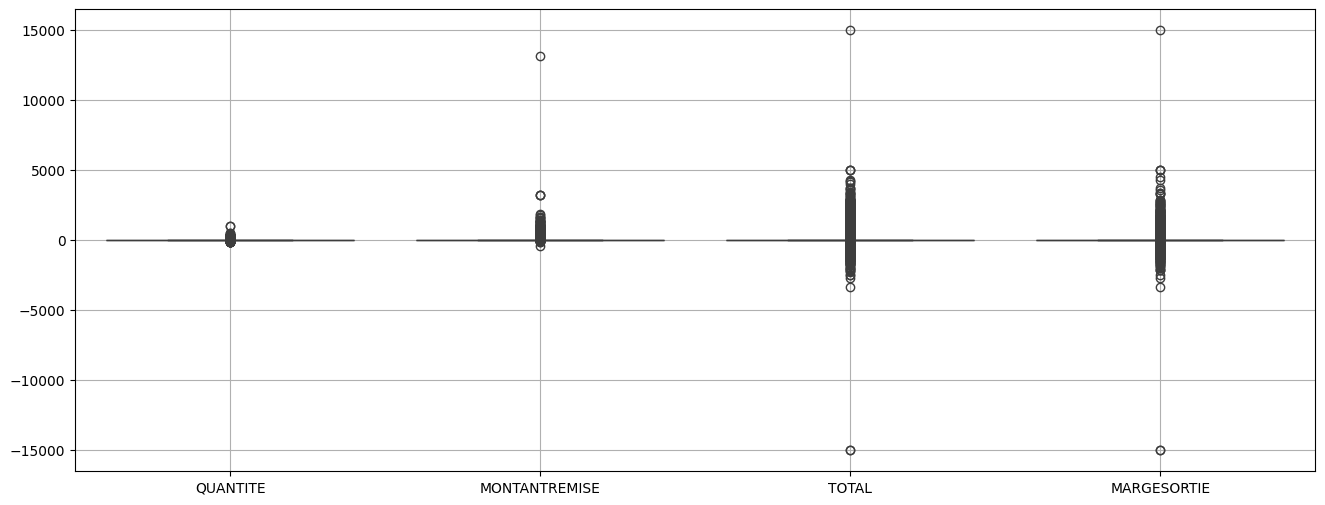

In [97]:
boxplot(data3)

In [98]:
from pandas.api.types import is_numeric_dtype

# Fonction pour détecter les outliers en utilisant l'IQR
def detect_outliers_iqr(data3, column):
    Q1 = data3[column].quantile(0.25)
    Q3 = data3[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data3[(data3[column] < lower_bound) | (data3[column] > upper_bound)]
    return outliers

# Boucler à travers les colonnes numériques pour détecter les outliers
for col in data3.columns:
    if is_numeric_dtype(data3[col]):
        outliers = detect_outliers_iqr(data3, col)
        if len(outliers) > 0:
            print(f"Outliers détectés dans la colonne '{col}':")
            print(outliers)

Outliers détectés dans la colonne 'QUANTITE':
              IDTICKET NUMLIGNETICKET IDARTICLE  QUANTITE  MONTANTREMISE  \
9         190400316270              4    165207       3.0          2.250   
10        190400316270              5    165291       3.0          1.483   
18        190400316273              4    248244       2.0          0.000   
23        190400316273              7    248214       2.0          0.000   
37        190400316277              1    784645       3.0          0.000   
...                ...            ...       ...       ...            ...   
34105688  130400568238              4    155554       2.0          0.000   
34105696  340200383182              5    179749       2.0          0.000   
34105697  340200383182              6    699430       3.0          0.000   
34105703  340200383203              5    250580       2.0          0.000   
34105704  340200383217              1    816313      20.0          1.818   

          TOTAL  MARGESORTIE  
9         

In [99]:
# Fonction pour imputer les outliers 
def impute_outliers(data3, columns):
    Q1 = np.percentile(data3[columns],25)
    Q3 = np.percentile(data3[columns],75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data3.loc[data3[columns] < lower_bound, columns] = lower_bound 
    data3.loc[data3[columns] > upper_bound,columns]=upper_bound
for columns in columns:
    impute_outliers(data3,columns)

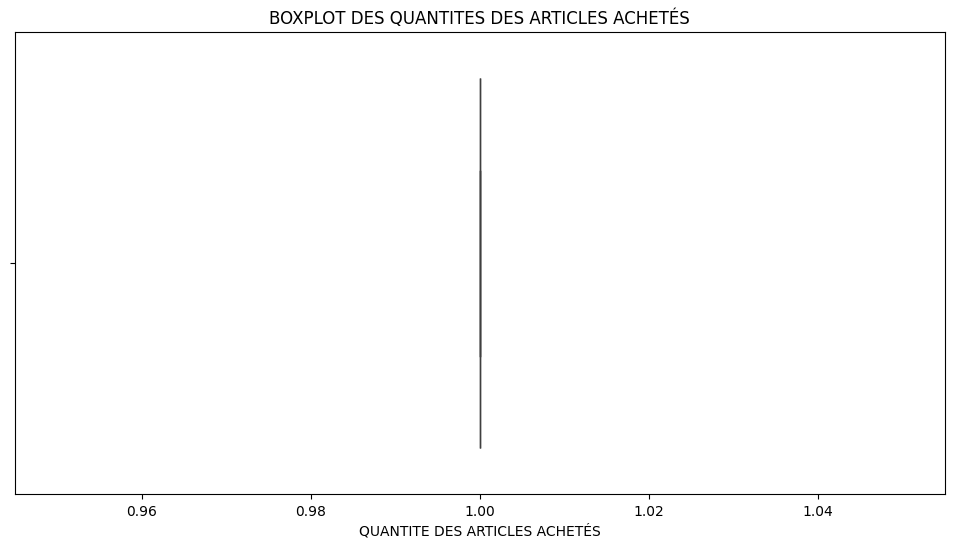

In [100]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data3, x='QUANTITE')
plt.xlabel('QUANTITE DES ARTICLES ACHETÉS')
plt.title("BOXPLOT DES QUANTITES DES ARTICLES ACHETÉS")
plt.show()

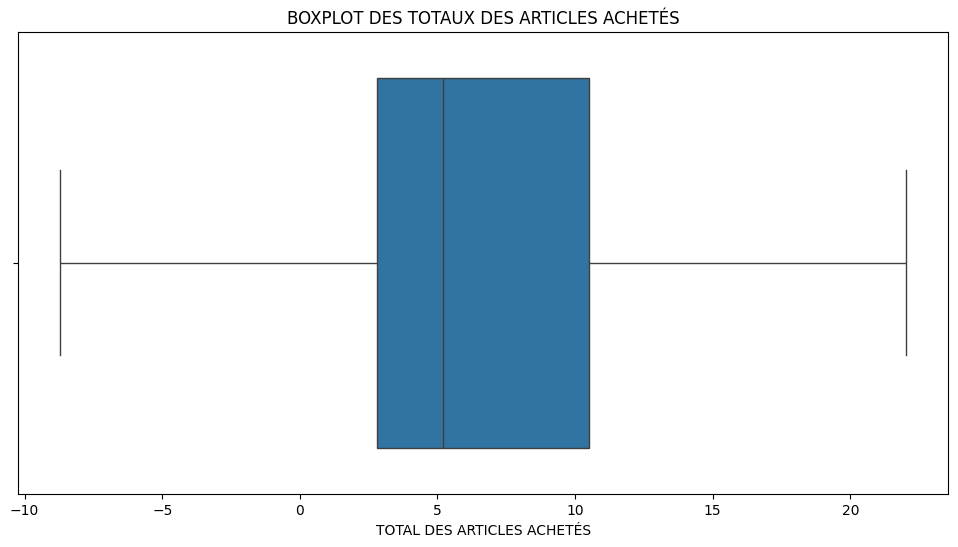

In [101]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data3, x='TOTAL')
plt.xlabel('TOTAL DES ARTICLES ACHETÉS')
plt.title("BOXPLOT DES TOTAUX DES ARTICLES ACHETÉS")
plt.show()

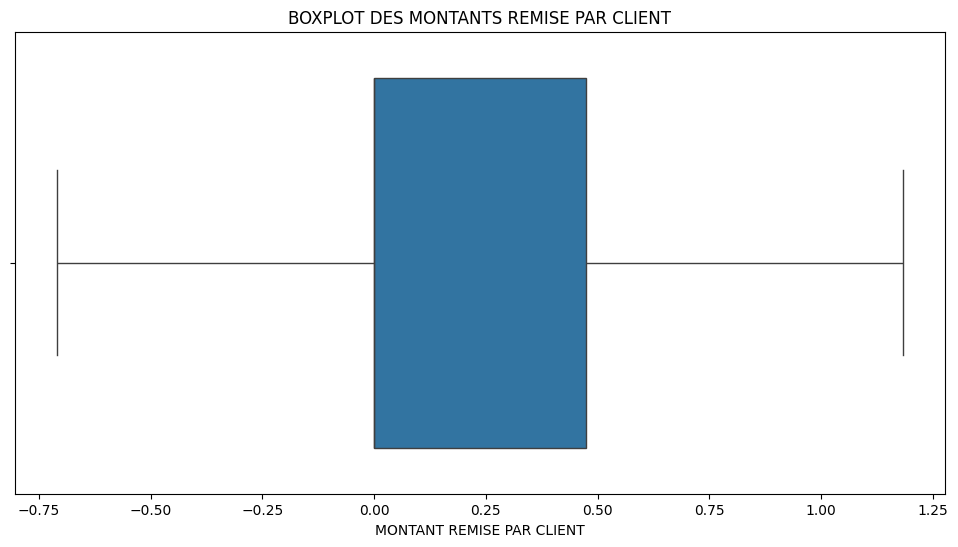

In [102]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data3, x='MONTANTREMISE')
plt.xlabel('MONTANT REMISE PAR CLIENT')
plt.title("BOXPLOT DES MONTANTS REMISE PAR CLIENT")
plt.show()

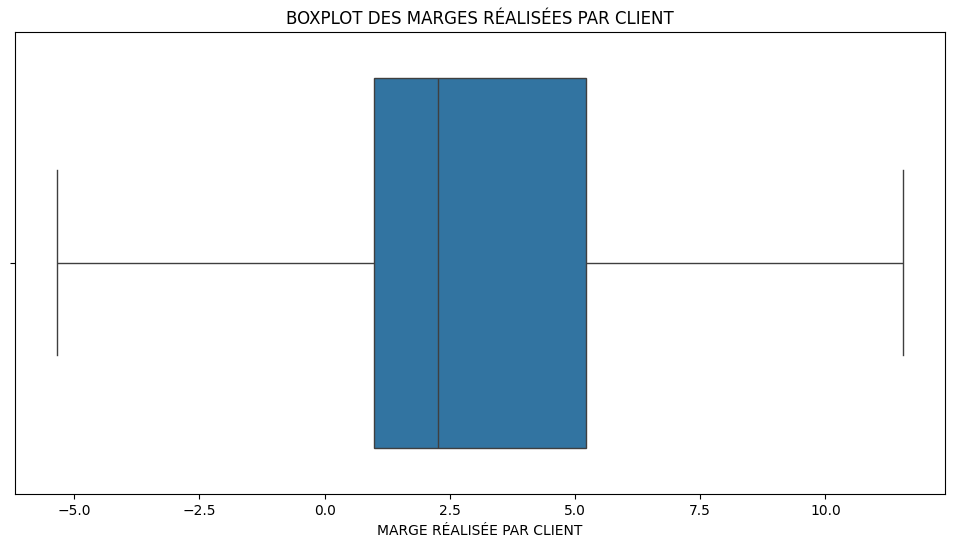

In [103]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data3, x='MARGESORTIE')
plt.xlabel('MARGE RÉALISÉE PAR CLIENT')
plt.title("BOXPLOT DES MARGES RÉALISÉES PAR CLIENT")
plt.show()

In [104]:
import numpy as np
columns= ['QUANTITE', 'MONTANTREMISE', 'TOTAL', 'MARGESORTIE']
# Créer un sous-dataset composé uniquement des outliers
def subdataset_outliers(data3, columns):
    Q1 = np.percentile(data3[columns], 25)
    Q3 = np.percentile(data3[columns], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data3[(data3[columns] < lower_bound) | (data3[columns] > upper_bound)]

# Appliquer la fonction pour une colonne spécifique
outliers_subset = subdataset_outliers(data3, columns)

In [105]:
# Appel à la fonction detect_outliers_iqr() pour obtenir les bornes lower_bound et upper_bound
outliers = detect_outliers_iqr(data3, columns)
lower_bound = outliers[columns].min()
upper_bound = outliers[columns].max()

# Remplacement des outliers par les bornes
data3[columns] = np.where(data3[columns] < lower_bound, lower_bound, data3[columns])
data3[columns] = np.where(data3[columns] > upper_bound, upper_bound, data3[columns])

In [106]:
data3[columns].shape

(34105705, 4)

In [107]:
data3[columns].max()

QUANTITE          1.0000
MONTANTREMISE     1.1825
TOTAL            22.0200
MARGESORTIE      11.5400
dtype: float64

In [108]:
data3[columns]

,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,1.0,0.0000,4.96,2.37
1,1.0,0.0000,8.25,3.63
2,1.0,0.0000,5.79,3.63
3,1.0,0.0000,18.29,6.21
4,1.0,0.0000,22.02,10.42
...,...,...,...,...
34105700,1.0,0.0000,4.69,1.83
34105701,1.0,0.0000,3.18,1.00
34105702,1.0,0.0000,3.46,1.13
34105703,1.0,0.0000,6.80,2.18


In [109]:
data3.describe()

,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
count,34105705.0,3.410570e+07,3.410570e+07,3.410570e+07
mean,1.0,2.790697e-01,7.553460e+00,3.461244e+00
std,0.0,4.499037e-01,6.522058e+00,3.454784e+00
min,1.0,-7.095000e-01,-8.700000e+00,-5.340000e+00
25%,1.0,0.000000e+00,2.820000e+00,9.900000e-01
50%,1.0,0.000000e+00,5.210000e+00,2.260000e+00
75%,1.0,4.730000e-01,1.050000e+01,5.210000e+00
max,1.0,1.182500e+00,2.202000e+01,1.154000e+01


La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [110]:
print(data3.duplicated().sum())
data = data3.drop_duplicates()

130


Nous allons désormais procéder au traitement de ces doublons.

In [111]:
data3.drop_duplicates(keep='first', inplace=True)

Code de vérification.

In [112]:
print(data3.duplicated().sum())

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes (aucune valeur détectée).

In [113]:
data3.isnull().sum()

IDTICKET          0
NUMLIGNETICKET    0
IDARTICLE         0
QUANTITE          0
MONTANTREMISE     0
TOTAL             0
MARGESORTIE       0
dtype: int64

Chargement du jeu de données ENTETES TICKET V4.

In [114]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\ENTETES_TICKET_V4.csv"
data2 = pd.read_csv(dataset_path, sep='|', low_memory=False)
print(data2.shape)
print(list(data2.columns))


(6714173, 5)
['IDTICKET', 'TIC_DATE', 'MAG_CODE', 'IDCLIENT', 'TIC_TOTALTTC']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [116]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      int64  
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      float64
 4   TIC_TOTALTTC  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 256.1+ MB


Aperçu de notre jeu de données. 

In [117]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,2016-01-02 11:01:33,ALB,2995104.0,"12,9"
1,50100150511,2016-01-02 11:02:10,ALB,1411117.0,"131,06"
2,50100150515,2016-01-02 12:03:27,ALB,222592.0,"34,69"
3,50100150517,2016-01-02 14:23:21,ALB,2979958.0,"97,58"
4,50100150518,2016-01-02 14:26:53,ALB,2858676.0,"4,7"
...,...,...,...,...,...
6714168,1340300014404,2016-12-27 16:31:52,RMA,2292927.0,"59,45"
6714169,1340300014407,2016-12-27 16:35:21,RMA,3189844.0,"26,9"
6714170,1340300014409,2016-12-27 16:38:59,RMA,3125998.0,"22,15"
6714171,1340300014438,2016-12-27 17:17:30,RMA,3252348.0,"118,01"


Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET et le NUM LIGNE TICKET en caractère. A l'inverse, nous devons convertir le total TTC en valeur numérique.

In [118]:
data2['IDTICKET'] = data2['IDTICKET'].astype(str)
data2['IDCLIENT'] = data2['IDCLIENT'].astype(str)

In [119]:
data2['TIC_TOTALTTC'] = data2['TIC_TOTALTTC'].str.replace(',', '.')

In [120]:
data2['TIC_TOTALTTC'] = data2['TIC_TOTALTTC'].str.strip('\"')

In [121]:
data2['TIC_TOTALTTC'] = pd.to_numeric(data2['TIC_TOTALTTC'], errors='coerce')

Vérification du traitement.

In [122]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      object 
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      object 
 4   TIC_TOTALTTC  float64
dtypes: float64(1), object(4)
memory usage: 256.1+ MB


In [123]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,2016-01-02 11:01:33,ALB,2995104.0,12.90
1,50100150511,2016-01-02 11:02:10,ALB,1411117.0,131.06
2,50100150515,2016-01-02 12:03:27,ALB,222592.0,34.69
3,50100150517,2016-01-02 14:23:21,ALB,2979958.0,97.58
4,50100150518,2016-01-02 14:26:53,ALB,2858676.0,4.70
...,...,...,...,...,...
6714168,1340300014404,2016-12-27 16:31:52,RMA,2292927.0,59.45
6714169,1340300014407,2016-12-27 16:35:21,RMA,3189844.0,26.90
6714170,1340300014409,2016-12-27 16:38:59,RMA,3125998.0,22.15
6714171,1340300014438,2016-12-27 17:17:30,RMA,3252348.0,118.01


La ligne de code ci-dessous nous permet de formater le format de la date.

In [124]:
from datetime import datetime
data2['TIC_DATE'] = pd.to_datetime(data2['TIC_DATE'], format="%Y-%m-%d %H:%M:%S")
data2['TIC_DATE'] = data2['TIC_DATE'].dt.strftime("%d/%m/%Y")

Vérification du traitement.

In [125]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,02/01/2016,ALB,2995104.0,12.90
1,50100150511,02/01/2016,ALB,1411117.0,131.06
2,50100150515,02/01/2016,ALB,222592.0,34.69
3,50100150517,02/01/2016,ALB,2979958.0,97.58
4,50100150518,02/01/2016,ALB,2858676.0,4.70
...,...,...,...,...,...
6714168,1340300014404,27/12/2016,RMA,2292927.0,59.45
6714169,1340300014407,27/12/2016,RMA,3189844.0,26.90
6714170,1340300014409,27/12/2016,RMA,3125998.0,22.15
6714171,1340300014438,27/12/2016,RMA,3252348.0,118.01


Cette ligne de code nous permet d'identifier le nombre d'occurence de chaque code magasin, pour identifier les éventuels regroupements à effectuer. 

In [126]:
#modalités variables:
data2['MAG_CODE'].value_counts(dropna = False)

MAG_CODE
SSM    246506
MOB    221283
HEI    219713
BEA    205468
GEX    196669
        ...  
CLI     31063
STR     26694
SCH     25502
BAR     18254
SAL     18245
Name: count, Length: 66, dtype: int64

La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) en doublons.

In [127]:
print(data2.duplicated().sum())
data2 = data2.drop_duplicates()

0


La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) manquante(s)

In [128]:
pd.DataFrame(index=data2.columns, columns=['%_missing_values'], data= (data2.isna().sum().values / len(data2)*100))

,%_missing_values
IDTICKET,0.0
TIC_DATE,0.0
MAG_CODE,0.0
IDCLIENT,0.0
TIC_TOTALTTC,0.0


CALCUL DU NOMBRES DE MAGASINS (Mag Code) FREQUENTE PAR UN CLIENT (ID Client).

In [129]:
data2['IDCLIENT'] = data2['IDCLIENT'].astype(float)

In [130]:
data2['IDCLIENT'] = data2['IDCLIENT'].astype(int)

In [131]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      object 
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      int32  
 4   TIC_TOTALTTC  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 230.5+ MB


In [132]:

# Calcul de la fréquence et du total des achats par magasin et par client
data2['FREQUENCE_MAG'] = data2.groupby(['MAG_CODE', 'IDCLIENT'])['IDTICKET'].transform('count')

# Afficher le résultat
print(data2.head())

      IDTICKET    TIC_DATE MAG_CODE  IDCLIENT  TIC_TOTALTTC  FREQUENCE_MAG
0  50100150510  02/01/2016      ALB   2995104         12.90             35
1  50100150511  02/01/2016      ALB   1411117        131.06              4
2  50100150515  02/01/2016      ALB    222592         34.69             21
3  50100150517  02/01/2016      ALB   2979958         97.58             28
4  50100150518  02/01/2016      ALB   2858676          4.70             11


In [133]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG
0,50100150510,02/01/2016,ALB,2995104,12.90,35
1,50100150511,02/01/2016,ALB,1411117,131.06,4
2,50100150515,02/01/2016,ALB,222592,34.69,21
3,50100150517,02/01/2016,ALB,2979958,97.58,28
4,50100150518,02/01/2016,ALB,2858676,4.70,11
...,...,...,...,...,...,...
6714168,1340300014404,27/12/2016,RMA,2292927,59.45,5
6714169,1340300014407,27/12/2016,RMA,3189844,26.90,78
6714170,1340300014409,27/12/2016,RMA,3125998,22.15,31
6714171,1340300014438,27/12/2016,RMA,3252348,118.01,12


In [134]:
data2['FREQUENCE_MAG'].value_counts()

FREQUENCE_MAG
2      276456
3      273510
4      268312
5      258610
1      254447
        ...  
195       195
190       190
181       181
180       180
164       164
Name: count, Length: 253, dtype: int64

In [135]:
data_merged=data3.merge(data2, how='right',left_on='IDTICKET', right_on='IDTICKET')

In [136]:
data_merged

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG
0,50100150510,1,224168,1.0,0.0000,10.75,6.46,02/01/2016,ALB,2995104,12.90,35
1,50100150511,6,932088,1.0,0.0000,6.25,6.25,02/01/2016,ALB,1411117,131.06,4
2,50100150511,2,397817,1.0,0.6250,5.62,2.54,02/01/2016,ALB,1411117,131.06,4
3,50100150511,5,758445,1.0,1.1825,22.02,11.54,02/01/2016,ALB,1411117,131.06,4
4,50100150511,3,428877,1.0,0.3330,2.96,0.94,02/01/2016,ALB,1411117,131.06,4
...,...,...,...,...,...,...,...,...,...,...,...,...
34105921,1340300014438,4,279749,1.0,0.7500,6.71,3.08,27/12/2016,RMA,3252348,118.01,12
34105922,1340300014438,10,287843,1.0,1.1825,22.02,10.63,27/12/2016,RMA,3252348,118.01,12
34105923,1340300014440,2,363834,1.0,0.0000,19.95,10.40,27/12/2016,RMA,3243933,44.80,4
34105924,1340300014440,3,632190,1.0,0.0000,19.95,10.49,27/12/2016,RMA,3243933,44.80,4


In [137]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105926 entries, 0 to 34105925
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   IDTICKET        object 
 1   NUMLIGNETICKET  object 
 2   IDARTICLE       object 
 3   QUANTITE        float64
 4   MONTANTREMISE   float64
 5   TOTAL           float64
 6   MARGESORTIE     float64
 7   TIC_DATE        object 
 8   MAG_CODE        object 
 9   IDCLIENT        int32  
 10  TIC_TOTALTTC    float64
 11  FREQUENCE_MAG   int64  
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 2.9+ GB


In [138]:
# Calcul de la variété du panier par client
VARIETE_PANIER = data_merged.groupby('IDCLIENT')['IDARTICLE'].nunique().reset_index()
VARIETE_PANIER.columns = ['IDCLIENT', 'VARIETE_PANIER']

# Fusionner la variable de variété du panier avec le DataFrame original
data_merged = data_merged.merge(VARIETE_PANIER, on='IDCLIENT', how='right')

In [139]:
data_merged

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG,VARIETE_PANIER
0,200200135291,3,33258,1.0,0.0000,0.91,0.54,05/02/2016,IAB,2108,7.57,2,7
1,200200135291,2,33247,1.0,0.0000,1.24,0.72,05/02/2016,IAB,2108,7.57,2,7
2,200200135291,1,227040,1.0,1.1825,4.54,1.56,05/02/2016,IAB,2108,7.57,2,7
3,200500180521,1,312922,1.0,0.5450,4.86,2.71,08/05/2016,IAB,2108,20.58,2,7
4,200500180521,4,932088,1.0,0.0000,6.25,6.25,08/05/2016,IAB,2108,20.58,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105921,770100547217,6,217360,1.0,0.2270,2.09,0.32,31/12/2017,PEG,3517102,55.67,1,10
34105922,770100547217,7,33257,1.0,0.0750,0.67,0.39,31/12/2017,PEG,3517102,55.67,1,10
34105923,770100547217,8,33247,1.0,0.1330,1.16,0.64,31/12/2017,PEG,3517102,55.67,1,10
34105924,770100547217,9,58830,1.0,0.2750,2.47,0.85,31/12/2017,PEG,3517102,55.67,1,10


In [140]:
data_merged['VARIETE_PANIER'].value_counts()

VARIETE_PANIER
27     291932
22     291685
20     291132
24     290634
23     290262
        ...  
588       823
612       761
601       688
471       673
537       661
Name: count, Length: 732, dtype: int64

In [141]:
VARIETE_PANIER = VARIETE_PANIER.astype(int)

In [142]:
# Calculer le montant total de remises par client
TOTAL_REMISE_CLIENT = data_merged.groupby('IDCLIENT')['MONTANTREMISE'].sum()

# Calculer le montant total dépensé par chaque client
TOTAL_DEPENSES = data_merged.groupby('IDCLIENT')['TOTAL'].sum()

# Calculer le taux de remise pour chaque client
TAUX_REMISE = TOTAL_REMISE_CLIENT / TOTAL_DEPENSES
# Nommer la série de taux de remise
TAUX_REMISE.name = 'TAUX_REMISE'

# Fusionner la variable de taux de remise avec le DataFrame original
data_merged = data_merged.merge(TAUX_REMISE, on='IDCLIENT', how='left')

In [143]:
data_merged['TAUX_REMISE'].value_counts()

TAUX_REMISE
0.000000    323815
0.041829     19299
0.047027     11690
0.011163      5570
0.183374      4729
             ...  
0.326657         1
0.178625         1
0.052593         1
0.120787         1
0.053073         1
Name: count, Length: 646644, dtype: int64

In [144]:
# Calculer l'ancienneté par rapport à la première commande pour chaque client
data_merged['ANCIENNETE_PRE_CDE'] = data_merged.groupby('IDCLIENT')['TIC_DATE'].transform(lambda x: (x - x.min()).dt.days)

# Calculer l'ancienneté par rapport à la dernière commande pour chaque client
data_merged['ANCIENNETE_DRE_CDE'] = data_merged.groupby('IDCLIENT')['TIC_DATE'].transform(lambda x: (x.max() - x).dt.days)

# Afficher l'ancienneté par rapport à la première et à la dernière commande pour chaque client
print(data_merged[['IDCLIENT', 'TIC_DATE', 'ANCIENNETE_PRE_CDE', 'ANCIENNETE_DRE_CDE']])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [145]:
data_merged

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG,VARIETE_PANIER,TAUX_REMISE
0,200200135291,3,33258,1.0,0.0000,0.91,0.54,05/02/2016,IAB,2108,7.57,2,7,0.101067
1,200200135291,2,33247,1.0,0.0000,1.24,0.72,05/02/2016,IAB,2108,7.57,2,7,0.101067
2,200200135291,1,227040,1.0,1.1825,4.54,1.56,05/02/2016,IAB,2108,7.57,2,7,0.101067
3,200500180521,1,312922,1.0,0.5450,4.86,2.71,08/05/2016,IAB,2108,20.58,2,7,0.101067
4,200500180521,4,932088,1.0,0.0000,6.25,6.25,08/05/2016,IAB,2108,20.58,2,7,0.101067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105921,770100547217,6,217360,1.0,0.2270,2.09,0.32,31/12/2017,PEG,3517102,55.67,1,10,0.082558
34105922,770100547217,7,33257,1.0,0.0750,0.67,0.39,31/12/2017,PEG,3517102,55.67,1,10,0.082558
34105923,770100547217,8,33247,1.0,0.1330,1.16,0.64,31/12/2017,PEG,3517102,55.67,1,10,0.082558
34105924,770100547217,9,58830,1.0,0.2750,2.47,0.85,31/12/2017,PEG,3517102,55.67,1,10,0.082558


Chargement du jeu de données REF_ARTICLE.

In [146]:
dataset_path = "C:\\Users\\belga\\OneDrive\\Bureau\\EMBA Big Data\\Module Datascience\\Projet Data Science S2 2024\\REF_ARTICLE.csv"
data4 = pd.read_csv(dataset_path, sep='|', low_memory=False)
print(data4.shape)
print(list(data4.columns))


(665946, 4)
['CODEARTICLE', 'CODEUNIVERS', 'CODEFAMILLE', 'CODESOUSFAMILLE']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [147]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665946 entries, 0 to 665945
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   CODEARTICLE      665946 non-null  object
 1   CODEUNIVERS      665946 non-null  object
 2   CODEFAMILLE      665946 non-null  object
 3   CODESOUSFAMILLE  665946 non-null  object
dtypes: object(4)
memory usage: 20.3+ MB


Aperçu de notre jeu de données. 

In [148]:
data4

,CODEARTICLE,CODEUNIVERS,CODEFAMILLE,CODESOUSFAMILLE
0,COUPON,COUPON,COUPON,COUPON
1,1001,U2,130,130040
2,100125,U1,010,010020
3,100150,U1,010,010020
4,10018,U1,100,100900
...,...,...,...,...
665941,407717,U3,120,120070
665942,407719,U3,120,120070
665943,407720,U3,120,120070
665944,407721,U3,120,120070


In [149]:
data4.drop(0, inplace=True)

In [150]:
data4

,CODEARTICLE,CODEUNIVERS,CODEFAMILLE,CODESOUSFAMILLE
1,1001,U2,130,130040
2,100125,U1,010,010020
3,100150,U1,010,010020
4,10018,U1,100,100900
5,10019,U1,100,100900
...,...,...,...,...
665941,407717,U3,120,120070
665942,407719,U3,120,120070
665943,407720,U3,120,120070
665944,407721,U3,120,120070


In [151]:
#modalités variables:
data4['CODEARTICLE'].value_counts(dropna = False)

CODEARTICLE
1001      1
278616    1
277497    1
277502    1
299706    1
         ..
145641    1
145642    1
145643    1
145644    1
407723    1
Name: count, Length: 665945, dtype: int64

In [152]:
data4['CODEUNIVERS'].value_counts(dropna = False)

CODEUNIVERS
U1    274652
U2    236139
U3     72725
U4     66413
U0     16016
Name: count, dtype: int64

In [153]:
data4['CODEFAMILLE'].value_counts(dropna = False)

CODEFAMILLE
090    157747
010     65324
130     63055
120     60886
180     46685
080     36253
100     33971
140     33907
020     31685
220     30893
050     22395
030     22165
070     14484
110     11839
160      8561
190      6449
040      5176
400      3884
170      3570
900      2196
200      1613
230      1092
060       979
210       853
990       283
Name: count, dtype: int64

In [154]:
data4['CODESOUSFAMILLE'].value_counts(dropna = False)

CODESOUSFAMILLE
180090    44779
140010    23698
120060    23371
090800    23326
090070    21254
          ...  
100110        1
110110        1
900990        1
200060        1
180999        1
Name: count, Length: 343, dtype: int64

La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) en doublons.

In [155]:
print(data4.duplicated().sum())
data1 = data4.drop_duplicates()

0


La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) manquante(s)

In [156]:
pd.DataFrame(index=data4.columns, columns=['%_missing_values'], data= (data4.isna().sum().values / len(data4)*100))

,%_missing_values
CODEARTICLE,0.0
CODEUNIVERS,0.0
CODEFAMILLE,0.0
CODESOUSFAMILLE,0.0
